# Data Preprocessing and Cleaning (Exploring)

## Data Variable Categories and Descriptions

### 1. Personal Characteristics
- **AGE**: Age (grouped data).
- **EDUC**: Education level.
- **ETHNIC**: Whether the individual is of Hispanic or Latino origin.
- **RACE**: Race.
- **GENDER**: Gender.
- **VETERAN**: Veteran status.

---

### 2. Treatment Services and Institutions
- **SPHSERVICE**: Whether services were received from a state psychiatric hospital.
- **CMPSERVICE**: Whether services were received from community mental health centers.
- **OPISERVICE**: Whether services were received from other psychiatric inpatient settings.
- **RTCSERVICE**: Whether services were received from residential treatment centers.
- **IJSSERVICE**: Whether mental health services were received in the justice system (e.g., prison or juvenile detention).

---

### 3. Mental Health and Diagnosis
- **SUB**: Substance use diagnosis.
- **MARSTAT**: Marital status.
- **SMISED**: Serious Mental Illness (SMI) or Serious Emotional Disturbance (SED) status.
- **SAP**: Substance abuse problem.
- **NUMMHS**: Number of mental health diagnoses reported.

#### Diagnosis Flags
- **TRAUSTREFLG**: Trauma- or stressor-related disorder reported.
- **ANXIETYFLG**: Anxiety disorder reported.
- **ADHDFLG**: Attention deficit/hyperactivity disorder reported.
- **CONDUCTFLG**: Conduct disorder reported.
- **DELIRDEMFLG**: Delirium/dementia disorder reported.
- **BIPOLARFLG**: Bipolar disorder reported.
- **DEPRESSFLG**: Depressive disorder reported (target variable).
- **ODDFLG**: Oppositional defiant disorder reported.
- **PDDFLG**: Pervasive developmental disorder reported.
- **PERSONFLG**: Personality disorder reported.
- **SCHIZOFLG**: Schizophrenia or other psychotic disorder reported.
- **ALCSUBFLG**: Alcohol or substance-related disorder reported.
- **OTHERDISFLG**: Other mental disorders reported.

---

### 4. Socioeconomic and Living Conditions
- **EMPLOY**: Employment status (full-time, part-time, unemployed, or not in the labor force).
- **DETNLF**: Detailed "Not in Labor Force" category (e.g., retired, student, homemaker).
- **LIVARAG**: Residential status (homeless, private residence, or other).
- **STATEFIP**: State code.
- **DIVISION**: Census division.
- **REGION**: Census region.


## Data loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [2]:
# data = pd.read_csv('SAMHSA Data/mhcld_puf_2022 2.csv')
data = pd.read_csv('C:/Users/viviy/Desktop/data/mhcld_puf_2022.csv')

## Data Exploration

In [3]:
print(data.shape)

(6957919, 40)


In [4]:
print(data.head())

   YEAR  AGE  EDUC  ETHNIC  RACE  GENDER  SPHSERVICE  CMPSERVICE  OPISERVICE  \
0  2022   14    -9       3     3       2           2           1           2   
1  2022    7     3       3     4       1           2           1           2   
2  2022    8     3       3    -9       2           2           1           1   
3  2022   14     4       4     2       2           1           1           2   
4  2022    3    -9       4     6       2           2           1           1   

   RTCSERVICE  ...  ODDFLG  PDDFLG  PERSONFLG  SCHIZOFLG  ALCSUBFLG  \
0           2  ...       0       0          0          1          0   
1           2  ...       0       0          0          1          0   
2           2  ...       0       0          0          0          0   
3           2  ...       0       0          0          1          0   
4           2  ...       0       0          0          0          0   

   OTHERDISFLG  STATEFIP  DIVISION  REGION       CASEID  
0            0         1         6

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957919 entries, 0 to 6957918
Data columns (total 40 columns):
 #   Column       Dtype
---  ------       -----
 0   YEAR         int64
 1   AGE          int64
 2   EDUC         int64
 3   ETHNIC       int64
 4   RACE         int64
 5   GENDER       int64
 6   SPHSERVICE   int64
 7   CMPSERVICE   int64
 8   OPISERVICE   int64
 9   RTCSERVICE   int64
 10  IJSSERVICE   int64
 11  MH1          int64
 12  MH2          int64
 13  MH3          int64
 14  SUB          int64
 15  MARSTAT      int64
 16  SMISED       int64
 17  SAP          int64
 18  EMPLOY       int64
 19  DETNLF       int64
 20  VETERAN      int64
 21  LIVARAG      int64
 22  NUMMHS       int64
 23  TRAUSTREFLG  int64
 24  ANXIETYFLG   int64
 25  ADHDFLG      int64
 26  CONDUCTFLG   int64
 27  DELIRDEMFLG  int64
 28  BIPOLARFLG   int64
 29  DEPRESSFLG   int64
 30  ODDFLG       int64
 31  PDDFLG       int64
 32  PERSONFLG    int64
 33  SCHIZOFLG    int64
 34  ALCSUBFLG    int64

In [6]:
print(data.describe())

            YEAR           AGE          EDUC        ETHNIC          RACE  \
count  6957919.0  6.957919e+06  6.957919e+06  6.957919e+06  6.957919e+06   
mean      2022.0  6.906807e+00 -2.893766e+00  1.930815e+00  2.941775e+00   
std          0.0  4.054777e+00  6.287160e+00  4.495802e+00  4.548226e+00   
min       2022.0 -9.000000e+00 -9.000000e+00 -9.000000e+00 -9.000000e+00   
25%       2022.0  3.000000e+00 -9.000000e+00  3.000000e+00  3.000000e+00   
50%       2022.0  7.000000e+00 -9.000000e+00  4.000000e+00  5.000000e+00   
75%       2022.0  1.000000e+01  4.000000e+00  4.000000e+00  5.000000e+00   
max       2022.0  1.400000e+01  5.000000e+00  4.000000e+00  6.000000e+00   

             GENDER    SPHSERVICE    CMPSERVICE    OPISERVICE    RTCSERVICE  \
count  6.957919e+06  6.957919e+06  6.957919e+06  6.957919e+06  6.957919e+06   
mean   1.509873e+00  1.983040e+00  1.029606e+00  1.956536e+00  1.989749e+00   
std    7.047036e-01  1.291224e-01  1.694973e-01  2.038982e-01  1.007286e-01   

In [7]:
missing_values = data.isnull().sum()
missing_ratio = (missing_values / len(data)) * 100

missing_minus9 = (data == -9).sum()
missing_minus9_ratio = (missing_minus9 / len(data)) * 100

missing_summary = pd.DataFrame({
    "isnull_count": missing_values,
    "isnull_ratio": missing_ratio,
    "-9_count": missing_minus9,
    "-9_ratio": missing_minus9_ratio
})

print("\nSummaray:")
print(missing_summary)


Summaray:
             isnull_count  isnull_ratio  -9_count   -9_ratio
YEAR                    0           0.0         0   0.000000
AGE                     0           0.0      8064   0.115897
EDUC                    0           0.0   3554927  51.091814
ETHNIC                  0           0.0    997856  14.341299
RACE                    0           0.0    841091  12.088255
GENDER                  0           0.0     15605   0.224277
SPHSERVICE              0           0.0         0   0.000000
CMPSERVICE              0           0.0         0   0.000000
OPISERVICE              0           0.0         0   0.000000
RTCSERVICE              0           0.0         0   0.000000
IJSSERVICE              0           0.0         0   0.000000
MH1                     0           0.0   1058221  15.208872
MH2                     0           0.0   4717250  67.796851
MH3                     0           0.0   6351191  91.280036
SUB                     0           0.0   6038415  86.784784
MARSTAT      

## Data Cleaning

In [8]:

selected_columns = [
    "AGE", "EDUC", "ETHNIC", "RACE", "GENDER", "SPHSERVICE", "CMPSERVICE", 
    "OPISERVICE", "RTCSERVICE", "IJSSERVICE", "SUB", "MARSTAT", "SMISED", 
    "SAP", "NUMMHS", "EMPLOY", "DETNLF", "VETERAN", "LIVARAG", "TRAUSTREFLG", "ANXIETYFLG", 
    "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG", "BIPOLARFLG", "DEPRESSFLG", 
    "ODDFLG", "PDDFLG", "PERSONFLG", "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", 
    "STATEFIP", "DIVISION", "REGION"
]

filtered_data = data[selected_columns]
valid_data = filtered_data[(filtered_data != -9).all(axis=1)]

print(f"Original dataset size: {len(data)} rows")
print(f"Dataset size after selecting variables: {len(filtered_data)} rows")
print(f"Dataset size after removing rows with -9: {len(valid_data)} rows")


Original dataset size: 6957919 rows
Dataset size after selecting variables: 6957919 rows
Dataset size after removing rows with -9: 65857 rows


In [9]:
missing_minus9_valid = (valid_data == -9).sum()
missing_minus9_valid_ratio = (missing_minus9_valid / len(valid_data)) * 100

missing_summary_valid = pd.DataFrame({
    "-9_count": missing_minus9_valid,
    "-9_ratio": missing_minus9_valid_ratio
})

print("\nSummaray:")
print(missing_summary_valid)


Summaray:
             -9_count  -9_ratio
AGE                 0       0.0
EDUC                0       0.0
ETHNIC              0       0.0
RACE                0       0.0
GENDER              0       0.0
SPHSERVICE          0       0.0
CMPSERVICE          0       0.0
OPISERVICE          0       0.0
RTCSERVICE          0       0.0
IJSSERVICE          0       0.0
SUB                 0       0.0
MARSTAT             0       0.0
SMISED              0       0.0
SAP                 0       0.0
NUMMHS              0       0.0
EMPLOY              0       0.0
DETNLF              0       0.0
VETERAN             0       0.0
LIVARAG             0       0.0
TRAUSTREFLG         0       0.0
ANXIETYFLG          0       0.0
ADHDFLG             0       0.0
CONDUCTFLG          0       0.0
DELIRDEMFLG         0       0.0
BIPOLARFLG          0       0.0
DEPRESSFLG          0       0.0
ODDFLG              0       0.0
PDDFLG              0       0.0
PERSONFLG           0       0.0
SCHIZOFLG           0       0

### Current Challenge:

- The remaining valid data from 2022 is relatively small compared to the original dataset size, which could limit the performance and reliability of machine learning models.
---
### Proposed Solution: 
To address the challenge of insufficient data for 2022, we can incorporate data from 2020 and 2021. Here's the plan:

* Training and Validation Set:

     * Use combined data from 2020 and 2021 as the training and validation set.
* Test Set:

     * Reserve the 2022 data as the test set, enabling us to evaluate the model's performance on unseen, more recent data.

# Data Loading And Preprocessing (2020 & 2021 & 2022) (updated)

In [10]:
data_2020 = pd.read_csv('C:/Users/viviy/Desktop/data/mhcld_puf_2020.csv')
data_2021 = pd.read_csv('C:/Users/viviy/Desktop/data/mhcld_puf_2021.csv')
data_2022 = pd.read_csv('C:/Users/viviy/Desktop/data/mhcld_puf_2022.csv')
# it takes time, approximately 15 seconds

In [11]:
# Data Cleaning
filtered_data_2020 = data_2020[selected_columns]
valid_data_2020 = filtered_data_2020[(filtered_data_2020 != -9).all(axis=1)]

filtered_data_2021 = data_2021[selected_columns]
valid_data_2021 = filtered_data_2021[(filtered_data_2021 != -9).all(axis=1)]

filtered_data_2022 = data_2022[selected_columns]
valid_data_2022 = filtered_data_2022[(filtered_data_2022 != -9).all(axis=1)]

# Data Merging and Index Reset
# combined_data = pd.concat([valid_data_2020, valid_data_2021, valid_data_2022], axis=0).reset_index(drop=True)
combined_data = pd.concat([valid_data_2020, valid_data_2021, valid_data_2022], axis=0).drop_duplicates().reset_index(drop=True)

# Randomize data
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# splitting
train_size = int(0.5 * len(combined_data))  # 50% to be training data
val_size = int(0.3 * len(combined_data))    # 30% to be validation data

train_data = combined_data.iloc[:train_size]
validation_data = combined_data.iloc[train_size:train_size + val_size]
test_data = combined_data.iloc[train_size + val_size:]

print(f"Combined training data size: {len(combined_data)} rows")
print(f"Training data size: {len(train_data)} rows")
print(f"Validation data size: {len(validation_data)} rows")
print(f"Test data size: {len(test_data)} rows")

Combined training data size: 141680 rows
Training data size: 70840 rows
Validation data size: 42504 rows
Test data size: 28336 rows


In [12]:
# Check for duplicate rows between train, validation, and test sets
duplicate_train_val = pd.merge(train_data, validation_data, how='inner')
duplicate_train_test = pd.merge(train_data, test_data, how='inner')
duplicate_val_test = pd.merge(validation_data, test_data, how='inner')

print("Duplicate rows between train and validation:", len(duplicate_train_val))
print("Duplicate rows between train and test:", len(duplicate_train_test))
print("Duplicate rows between validation and test:", len(duplicate_val_test))

Duplicate rows between train and validation: 0
Duplicate rows between train and test: 0
Duplicate rows between validation and test: 0


## Data Visualization (Traning Data Set ONLY)

In [13]:
mapping_dict = {
    # Personal Characteristics
    'AGE': {1: '0-11 years', 2: '12-14 years', 3: '15-17 years', 4: '18-20 years', 5: '21-24 years', 6: '25-29 years', 7: '30-34 years', 8: '35-39 years', 9: '40-44 years', 10: '45-49 years', 11: '50-54 years', 12: '55-59 years', 13: '60-64 years', 14: '65 years and older'},
    'GENDER': {1: 'Male', 2: 'Female'},
    'RACE': {1: 'American Indian/Alaska Native', 2: 'Asian', 3: 'Black or African American', 4: 'Native Hawaiian or Other Pacific Islander', 5: 'White', 6: 'Some other race alone/two or more races'},    'ETHNIC': {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino'},
    'ETHNIC': {1: 'Mexican', 2: 'Puerto Rican', 3: 'Other Hispanic or Latino origin', 4: 'Not of Hispanic or Latino origin'},
    'EDUC': {1: 'Special education', 2: '0 to 8', 3: '9 to 11', 4: '12 (or GED)', 5: 'More than 12'},
    'VETERAN': {1: 'Yes', 2: 'No'},

    # Treatment Services and Institutions
    'SPHSERVICE': {1: 'Yes', 2: 'No'},
    'CMPSERVICE': {1: 'Yes', 2: 'No'},
    'OPISERVICE': {1: 'Yes', 2: 'No'},
    'RTCSERVICE': {1: 'Yes', 2: 'No'},
    'IJSSERVICE': {1: 'Yes', 2: 'No'},

    # Mental Health and Diagnosis
    'SMISED': {1: 'SMI', 2: 'SED and/or at risk for SED', 3: 'Not SMI/SED'},
    'SAP': {1: 'Yes', 2: 'No'},
    'SUB': {1: 'Alcohol-induced disorder', 2: 'Alcohol intoxication', 3: 'Substance-induced disorder', 4: 'Alcohol dependence', 5: 'Cocaine dependence', 6: 'Cannabis dependence', 7: 'Opioid dependence', 8: 'Other substance dependence', 9: 'Alcohol abuse', 10: 'Cocaine abuse', 11: 'Cannabis abuse', 12: 'Opioid abuse', 13: 'Other substance related conditions'},
    'MARSTAT': {1: 'Never married', 2: 'Now married', 3: 'Separated', 4: 'Divorced, widowed'},
    'NUMMHS': {0: 'None', 1: 'One', 2: 'Two', 3: 'Three'},
    'TRAUSTREFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ANXIETYFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ADHDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'CONDUCTFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'DELIRDEMFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'BIPOLARFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'DEPRESSFLG': {0: 'Disorder not reported', 1: 'Disorder reported'}, ### target y
    'ODDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'PDDFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'PERSONFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'SCHIZOFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'ALCSUBFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},
    'OTHERDISFLG': {0: 'Disorder not reported', 1: 'Disorder reported'},

    # Socioeconomic and Living Conditions
    'EMPLOY': {1: 'Full-time', 2: 'Part-time', 3: 'Employed full-time/part-time not differentiated', 4: 'Unemployed', 5: 'Not in labor force'},
    'DETNLF': {1: 'Retired, disabled', 2: 'Student', 3: 'Homemaker', 4: 'Sheltered/non-competitive employment', 5: 'Other'},
    'LIVARAG': {1: 'Experiencing Homelessness', 2: 'Private residence', 3: 'Other'},

    # Regional Information
    'STATEFIP': {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 
                9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
                16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 
                22: 'Louisiana', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
                28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 
                33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 
                38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 
                45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 
                50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 
                56: 'Wyoming', 72: 'Puerto Rico', 99: 'Other jurisdictions'},
    'DIVISION': {0: 'Other jurisdictions', 1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central', 
                 5: 'South Atlantic', 6: 'East South Central', 7: 'West South Central', 8: 'Mountain', 9: 'Pacific'},
    'REGION': {0: 'Other jurisdictions', 1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'},
}


In [14]:
mapping_data = train_data.copy()  
for column, mapping in mapping_dict.items():
    if column in mapping_data.columns:
        mapping_data[column] = mapping_data[column].map(mapping)

In [15]:
print(mapping_data.isnull().sum())

AGE            0
EDUC           0
ETHNIC         0
RACE           0
GENDER         0
SPHSERVICE     0
CMPSERVICE     0
OPISERVICE     0
RTCSERVICE     0
IJSSERVICE     0
SUB            0
MARSTAT        0
SMISED         0
SAP            0
NUMMHS         0
EMPLOY         0
DETNLF         0
VETERAN        0
LIVARAG        0
TRAUSTREFLG    0
ANXIETYFLG     0
ADHDFLG        0
CONDUCTFLG     0
DELIRDEMFLG    0
BIPOLARFLG     0
DEPRESSFLG     0
ODDFLG         0
PDDFLG         0
PERSONFLG      0
SCHIZOFLG      0
ALCSUBFLG      0
OTHERDISFLG    0
STATEFIP       0
DIVISION       0
REGION         0
dtype: int64


In [16]:
visualization_data = train_data.copy()

for col, mapping in mapping_dict.items():
    if col in visualization_data.columns:
        visualization_data[f'{col}_label'] = visualization_data[col].map(mapping)


In [17]:
def plot_with_dynamic_legend(data, features, target, mapping_dict):
    num_features = len(features)
    cols = 3  
    rows = math.ceil(num_features / cols)  

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        ax = axes[idx]
        sns.histplot(data=data, x=feature, hue=target, multiple="dodge", ax=ax, shrink=0.8)
        ax.set_title(f"{feature} by {target}")

        if feature in mapping_dict:
            legend_mapping = mapping_dict[feature]
            legend_text = "\n".join([f"{key}: {value}" for key, value in legend_mapping.items()])
            ax.text(
                0.95,
                0.95,
                legend_text,
                transform=ax.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                fontsize=10,
                bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
            )

    for idx in range(len(features), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

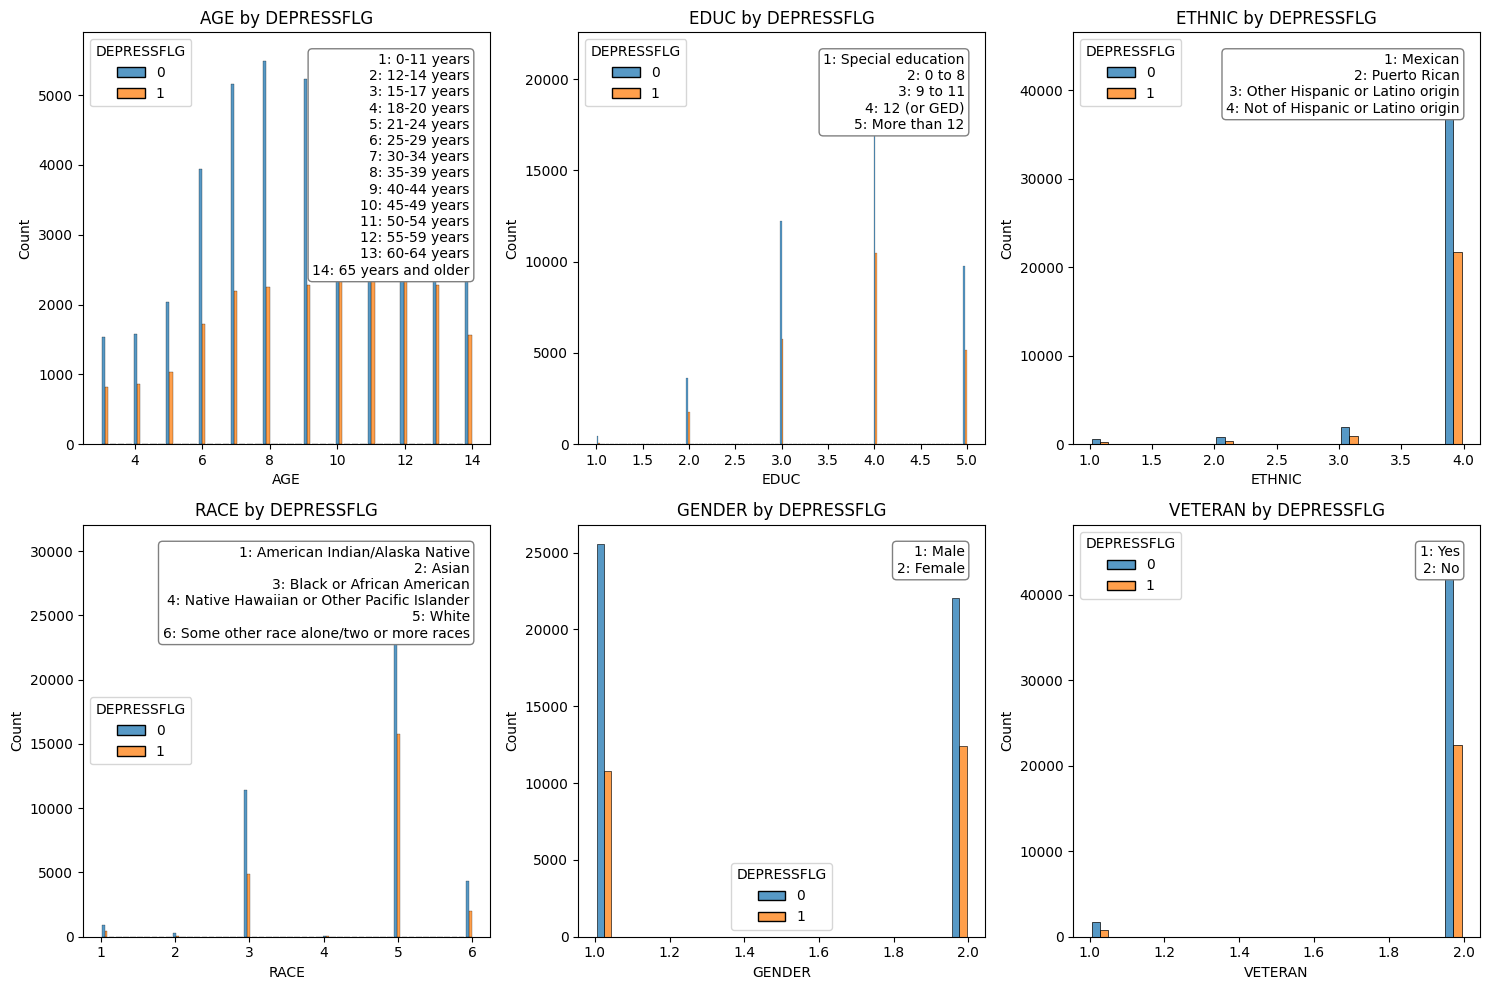

In [18]:
# Personal Characteristics
personal_characteristics = ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'VETERAN']
plot_with_dynamic_legend(data=visualization_data, 
                 features=personal_characteristics, 
                 target='DEPRESSFLG', 
                 mapping_dict=mapping_dict)

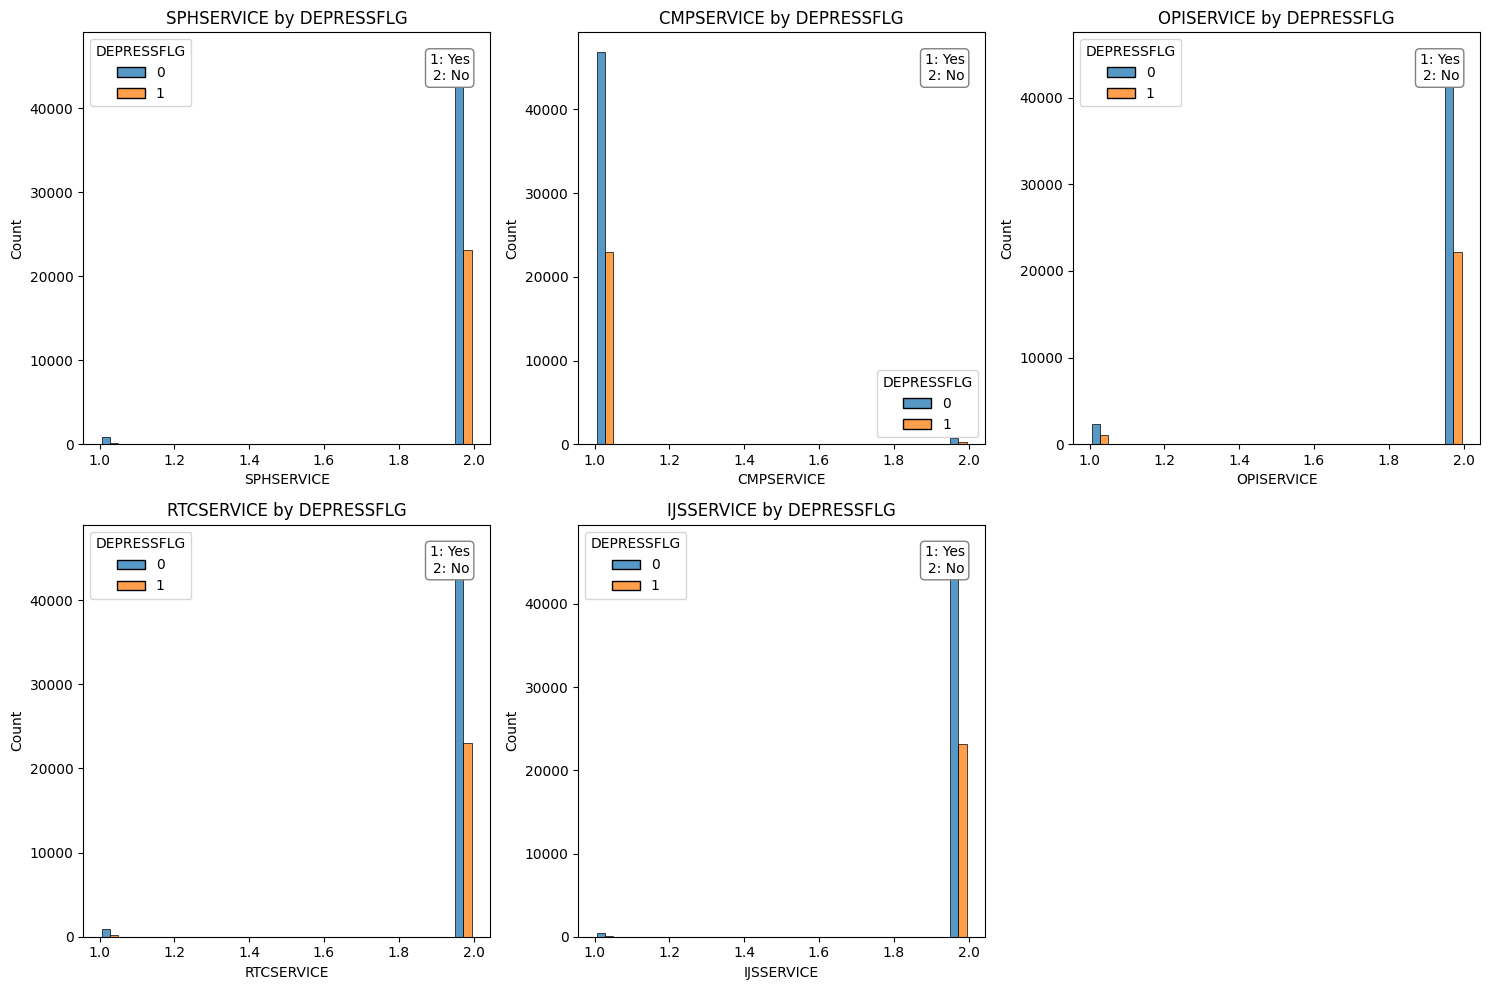

In [19]:
# Treatment Services and Institutions
treatment_services = ['SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE']

plot_with_dynamic_legend(data=visualization_data, 
                 features=treatment_services, 
                 target='DEPRESSFLG', 
                 mapping_dict=mapping_dict)

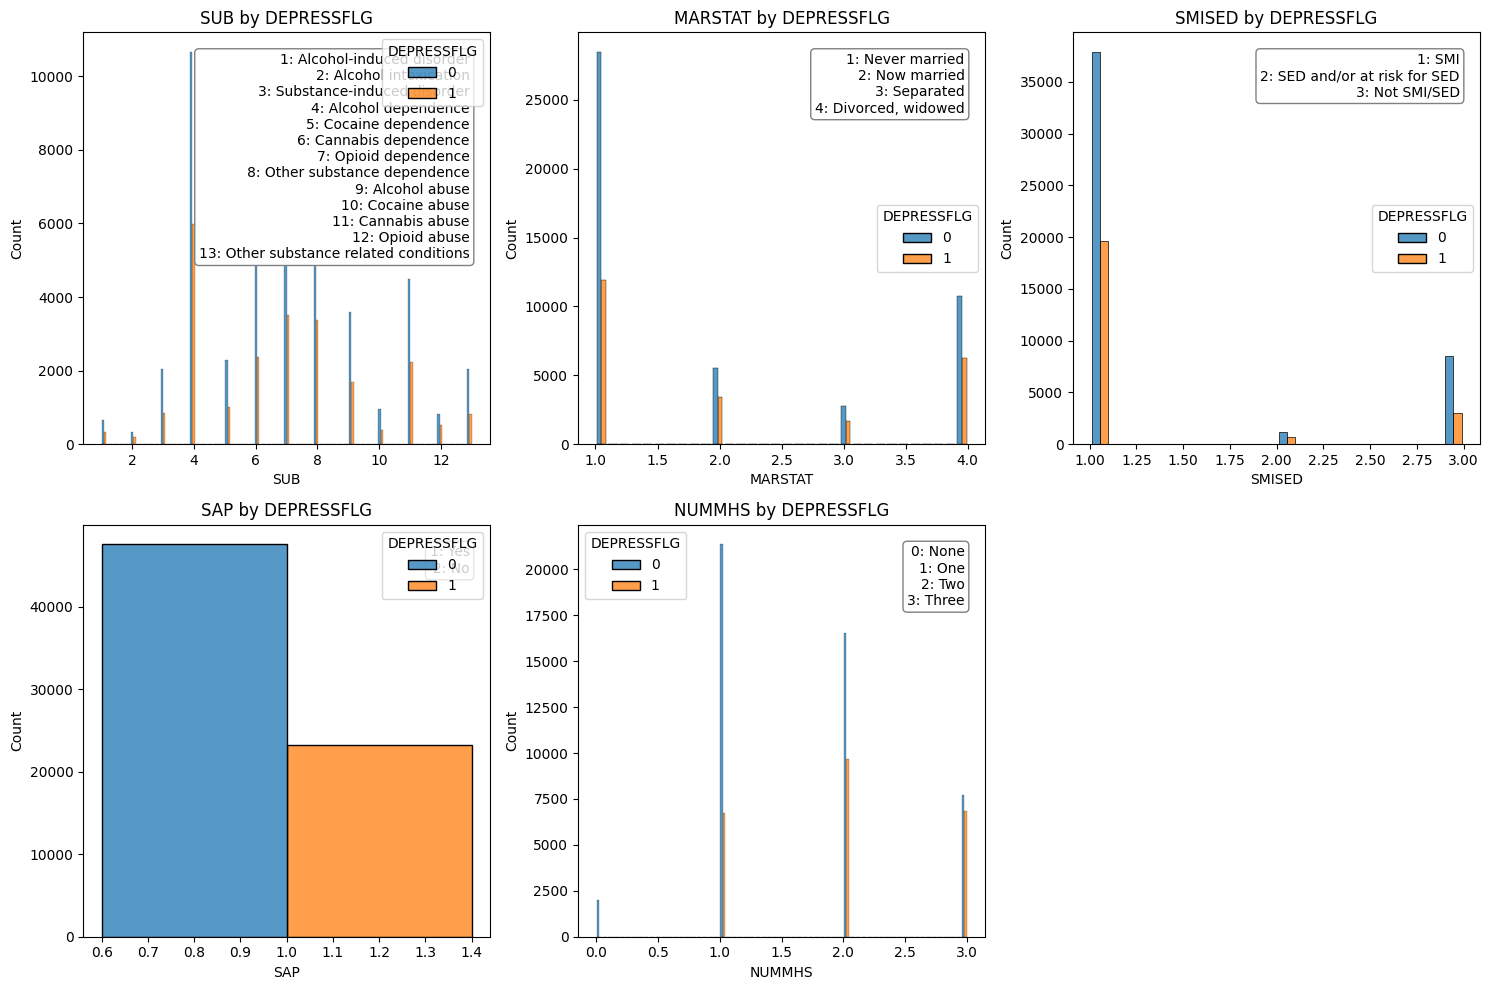

In [20]:
# Mental Health
mental_health_features = ['SUB', 'MARSTAT', 'SMISED', 'SAP', 'NUMMHS']
plot_with_dynamic_legend(
    data=visualization_data,
    features=mental_health_features,
    target='DEPRESSFLG',
    mapping_dict=mapping_dict
)

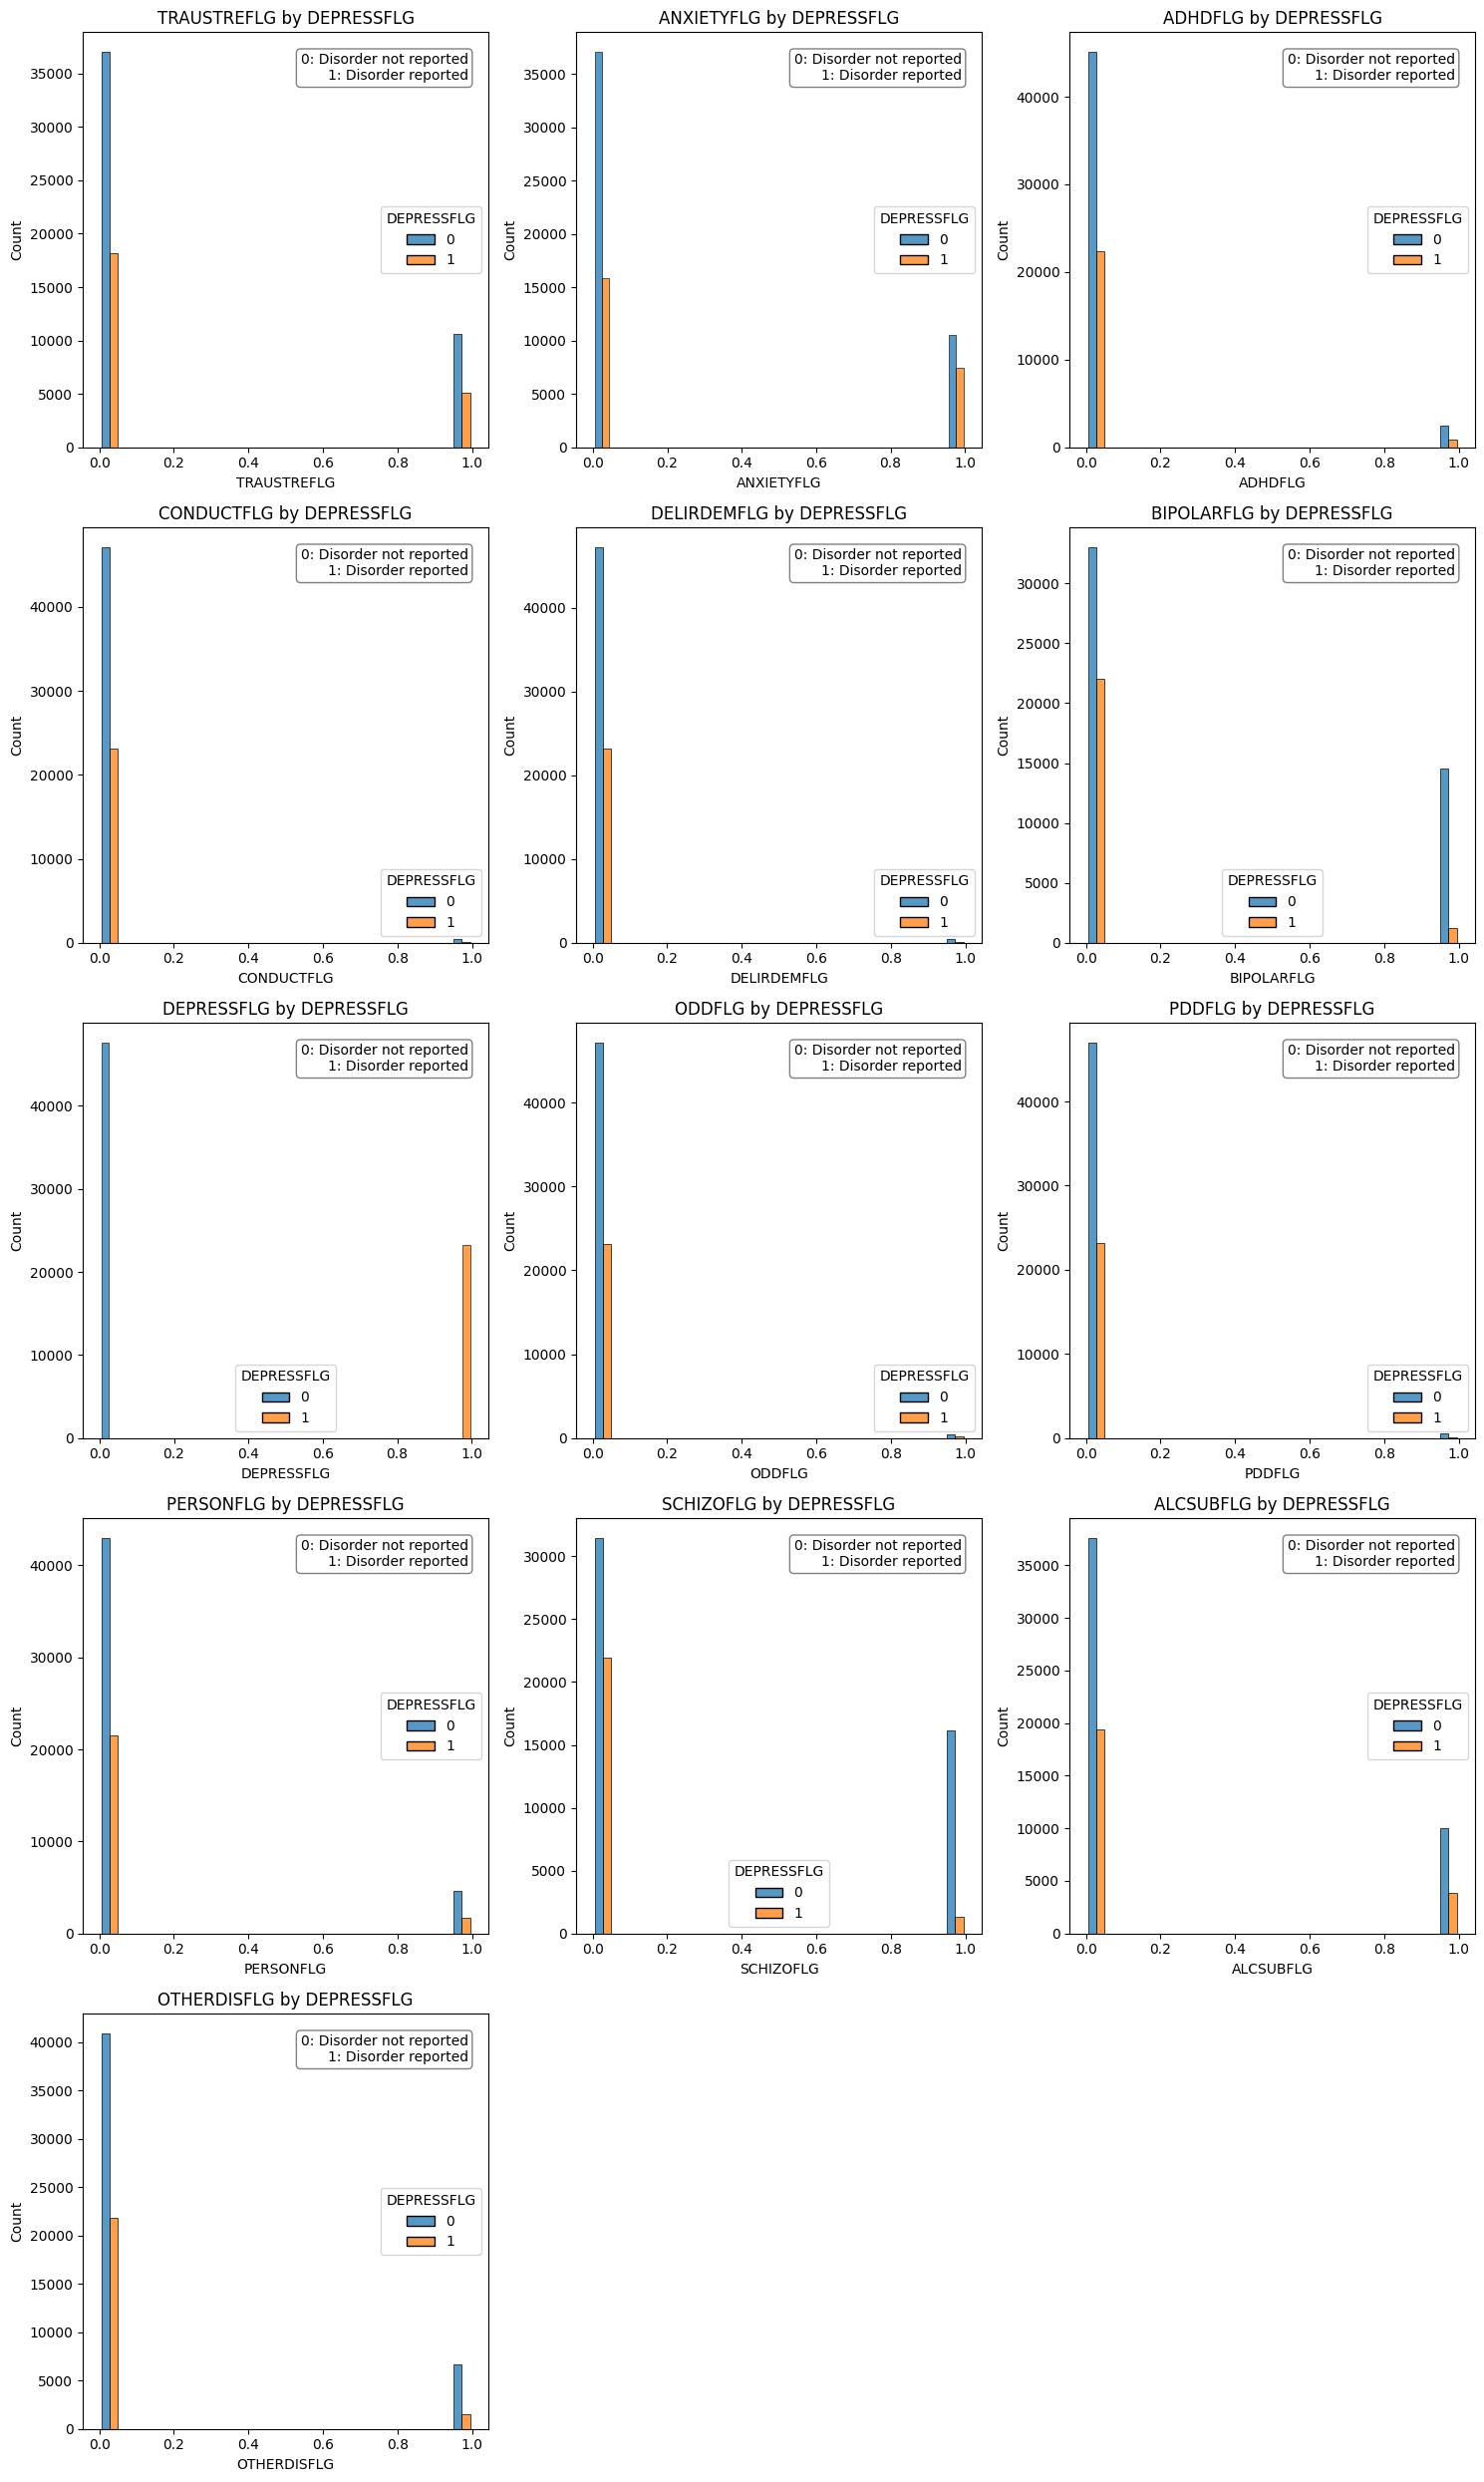

In [21]:
# Diagnosis Flags
diagnosis_flags_features = [
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
    'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
    'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'
]
plot_with_dynamic_legend(
    data=visualization_data,
    features=diagnosis_flags_features,
    target='DEPRESSFLG',
    mapping_dict=mapping_dict
)

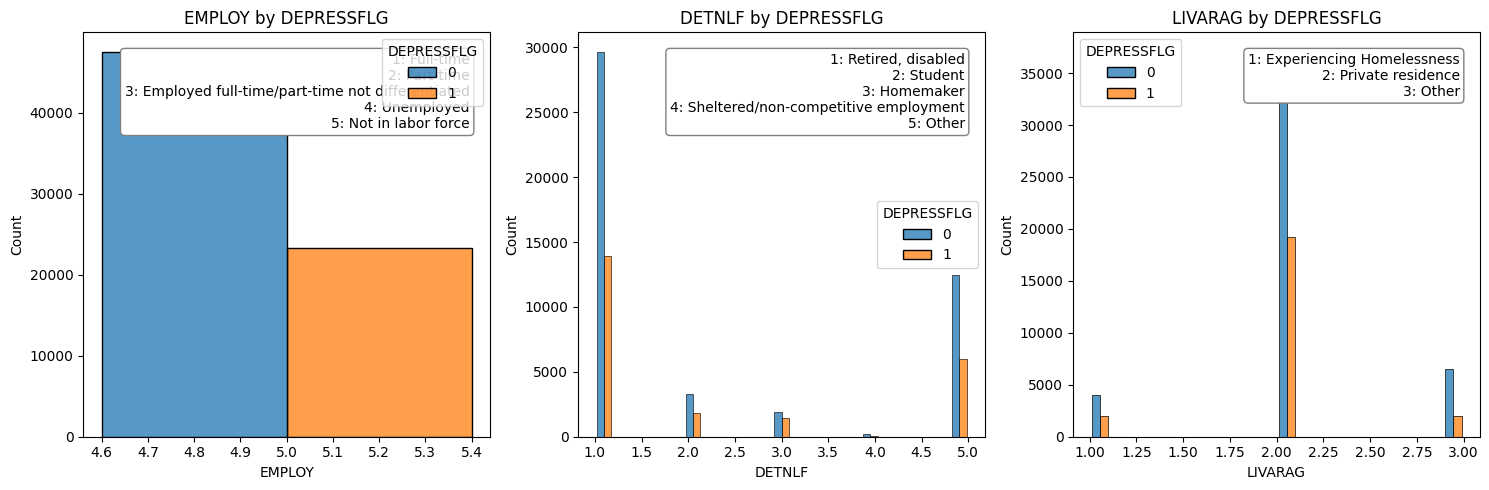

In [22]:
# Socioeconomic and Living Conditions
socioeconomic_features = ['EMPLOY', 'DETNLF', 'LIVARAG']
#socioeconomic_features = ['EMPLOY', 'DETNLF', 'LIVARAG', 'STATEFIP', 'DIVISION', 'REGION']

plot_with_dynamic_legend(
    data=visualization_data,
    features=socioeconomic_features,
    target='DEPRESSFLG',
    mapping_dict=mapping_dict
)

In [23]:
print(mapping_data[['STATEFIP', 'DEPRESSFLG']])

             STATEFIP             DEPRESSFLG
0            Michigan  Disorder not reported
1            Michigan  Disorder not reported
2      South Carolina  Disorder not reported
3            Michigan      Disorder reported
4            Maryland  Disorder not reported
...               ...                    ...
70835     Connecticut      Disorder reported
70836        Michigan      Disorder reported
70837         Alabama      Disorder reported
70838     Connecticut      Disorder reported
70839        Michigan  Disorder not reported

[70840 rows x 2 columns]


In [24]:
Region_visual_data = mapping_data.copy()
Region_visual_data['DEPRESSFLG_num'] = Region_visual_data['DEPRESSFLG'].map({'Disorder not reported': 0, 'Disorder reported': 1})


state_summary = Region_visual_data.groupby('STATEFIP')['DEPRESSFLG_num'].sum().reset_index()
state_summary.columns = ['State', 'Depression Count']

state_name_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Puerto Rico': 'PR', 'Other jurisdictions': 'OT'  
}


state_summary['State Code'] = state_summary['State'].map(state_name_to_code)

fig = px.choropleth(
    state_summary,
    locations='State Code',
    locationmode='USA-states',
    color='Depression Count',
    color_continuous_scale='Blues',
    scope='usa',
    title='Depression Counts by State'
)
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)
fig.show()




# Modeling

## Data Preparing

* Considerations for Data Preprocessing

  * The primary consideration for data preprocessing was the inconsistency in numerical encoding for variables like `Yes/No` or `Disorder reported/Disorder not reported`. Different variables used different numeric representations (e.g., `0/1` or `1/2`). To address this, all such variables were first mapped to their corresponding text labels for clarity and then converted into consistent dummy variables (0/1) for modeling purposes.

In [25]:
def map_to_text(data, mapping_dict):
    for column, mapping in mapping_dict.items():
        if column in data.columns:
            data[column] = data[column].map(mapping)
    return data

In [26]:
train_data_text = map_to_text(train_data.copy(), mapping_dict)
validation_data_text = map_to_text(validation_data.copy(), mapping_dict)
test_data_text = map_to_text(test_data.copy(), mapping_dict)

In [27]:
binary_columns = [
    'VETERAN', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE',
    'SAP', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 
    'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 
    'ALCSUBFLG', 'OTHERDISFLG'
]

for column in binary_columns:
    for data in [train_data_text, validation_data_text, test_data_text]:
        if column in data.columns:
            data[column] = data[column].apply(lambda x: 1 if 'Yes' in x or 'Disorder reported' in x else 0)


In [28]:
num_columns = ['NUMMHS']

num_mappings = {
    'NUMMHS': {'None': 0, 'One': 1, 'Two': 2, 'Three': 3}
}

for column in num_columns:
    for data in [train_data_text, validation_data_text, test_data_text]:
        if column in data.columns:
            data[column] = data[column].map(num_mappings[column])


In [29]:
all_columns = train_data_text.columns
remaining_columns = [col for col in all_columns if col not in num_columns + binary_columns]

for data in [train_data_text, validation_data_text, test_data_text]:
    data = pd.get_dummies(data, columns=remaining_columns, drop_first=True)


In [30]:
assert train_data_text.columns.equals(validation_data_text.columns)
assert train_data_text.columns.equals(test_data_text.columns)

In [31]:
print(train_data_text.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70840 entries, 0 to 70839
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGE          70840 non-null  object
 1   EDUC         70840 non-null  object
 2   ETHNIC       70840 non-null  object
 3   RACE         70840 non-null  object
 4   GENDER       70840 non-null  object
 5   SPHSERVICE   70840 non-null  int64 
 6   CMPSERVICE   70840 non-null  int64 
 7   OPISERVICE   70840 non-null  int64 
 8   RTCSERVICE   70840 non-null  int64 
 9   IJSSERVICE   70840 non-null  int64 
 10  SUB          70840 non-null  object
 11  MARSTAT      70840 non-null  object
 12  SMISED       70840 non-null  object
 13  SAP          70840 non-null  int64 
 14  NUMMHS       70840 non-null  int64 
 15  EMPLOY       70840 non-null  object
 16  DETNLF       70840 non-null  object
 17  VETERAN      70840 non-null  int64 
 18  LIVARAG      70840 non-null  object
 19  TRAUSTREFLG  70840 non-nu

In [32]:
y_train = train_data_text['DEPRESSFLG']
y_val = validation_data_text['DEPRESSFLG']
y_test = test_data_text['DEPRESSFLG']

X_train = train_data_text.drop(columns=['DEPRESSFLG'])
X_val = validation_data_text.drop(columns=['DEPRESSFLG'])
X_test = test_data_text.drop(columns=['DEPRESSFLG'])

Mean NUMMHS by DEPRESSFLG:
 DEPRESSFLG
0    1.629384
1    2.004859
Name: NUMMHS, dtype: float64


C:\Users\viviy\AppData\Local\Temp\ipykernel_14452\3921893578.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\viviy\AppData\Local\Temp\ipykernel_14452\3921893578.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



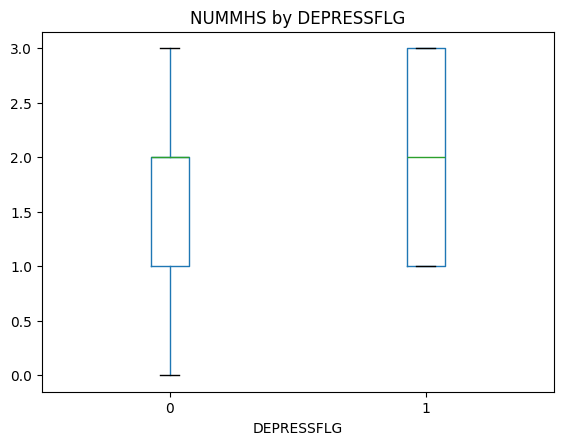

In [33]:
# Inspect the distribution of NUMMHS against DEPRESSFLG
train_data['NUMMHS'] = X_train['NUMMHS']
train_data['DEPRESSFLG'] = y_train
grouped = train_data.groupby('DEPRESSFLG')['NUMMHS'].mean()

print("Mean NUMMHS by DEPRESSFLG:\n", grouped)

# Plot
train_data.boxplot(column='NUMMHS', by='DEPRESSFLG', grid=False)
plt.title('NUMMHS by DEPRESSFLG')
plt.suptitle('')
plt.show()


Since the feature "NUMMHS" means the number of mental health diagnoses reported.  For instance, the value of this variable will be 3 if nonmissing values are provided for all three mental health diagnoses (MH1, MH2, and MH3), which already include depressions, and this will cuase biased predictions.

In [34]:
# Drop NUMMHS and retrain the model
X_train = X_train.drop(columns=['NUMMHS'])
X_val = X_val.drop(columns=['NUMMHS'])
X_test = X_test.drop(columns=['NUMMHS'])

In [35]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (70840, 33), y_train shape: (70840,)
X_val shape: (42504, 33), y_val shape: (42504,)
X_test shape: (28336, 33), y_test shape: (28336,)


## Baseline Model (majority rule)

In [36]:
majority_class = y_train.value_counts().idxmax()

In [37]:
def majority_rule_predict(X):
    return np.full(len(X), majority_class)

In [38]:
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    tpr = recall
    fpr = cm[0, 1] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    return acc, tpr, fpr, prec

In [39]:
y_test_pred_base = majority_rule_predict(X_test)
acc_base, tpr_base, fpr_base, prec_base = evaluate_model(y_test, y_test_pred_base)
print(f"Baseline Model - Accuracy: {acc_base}, TPR: {tpr_base}, FPR: {fpr_base}, Precision: {prec_base}")

Baseline Model - Accuracy: 0.6727837380011293, TPR: 0.0, FPR: 0.0, Precision: 0.0


## Random Forest

### One-hot Encoding for Categorical Variables

In [44]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = [col for col in X_train.columns]

X_train_final = pd.get_dummies(
    X_train, columns=categorical_columns, drop_first=True)
X_val_encoded = pd.get_dummies(
    X_val, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(
    X_test, columns=categorical_columns, drop_first=True)

# Ensure the test set has the same columns as the train set after encoding
X_test_final = X_test_encoded.reindex(
    columns=X_train_final.columns, fill_value=0)
X_val_final = X_val_encoded.reindex(
    columns=X_train_final.columns, fill_value=0)

In [43]:
# X_train_final = pd.concat([X_train_encoded[numerical_column],
#                           X_train_encoded.drop(columns=numerical_column)], axis=1)
# X_val_final = pd.concat([X_val_encoded[numerical_column],
#                         X_val_encoded.drop(columns=numerical_column)], axis=1)
# X_test_final = pd.concat([X_test_encoded[numerical_column],
#                          X_test_encoded.drop(columns=numerical_column)], axis=1)

In [45]:
print("Training data shape:", X_train_final.shape)
print('Validation data shape:', X_val_final.shape)
print("Test data shape:", X_test_final.shape)

Training data shape: (70840, 111)
Validation data shape: (42504, 111)
Test data shape: (28336, 111)


### Hyperparameter Tuning Process

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=2024, class_weight='balanced')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all processors
    verbose=2  # Print progress
)

# Fit the grid search to the training data
grid_search.fit(X_train_final, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


### Evaluate on the Validation Set

In [47]:
# Evaluate on the validation set
val_accuracy = best_rf_model.score(X_val_final, y_val)
print(f"Best Parameters: {best_params}")
print(f"Validation Set Accuracy: {val_accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Validation Set Accuracy: 0.8181


Validation Set Evaluation: The model with the best hyperparameters was evaluated on the validation set, achieving an accuracy of 96.10%.

### Train Final Model with Combined Training and Validation Sets

In [48]:
# Combine training and validation sets
X_final_train = np.vstack([X_train_final, X_val_final])
y_final_train = np.hstack([y_train, y_val])

# Train the final model on the combined training+validation set
final_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

final_rf_model.fit(X_final_train, y_final_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)

### Evaluate on the Test Set

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_test_pred = final_rf_model.predict(X_test_final)

# Evaluate performance
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\viviy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Test Set Accuracy: 0.8153
Confusion Matrix:
[[16092  2972]
 [ 2262  7010]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     19064
           1       0.70      0.76      0.73      9272

    accuracy                           0.82     28336
   macro avg       0.79      0.80      0.79     28336
weighted avg       0.82      0.82      0.82     28336



#### Class-Level Metrics:

##### Class 0:

Precision (0.88): Of all instances predicted as 0 (not at risk of depression), 88% were correct. This indicates the model has a very low false positive rate for class 0.

Recall (0.84): Of all actual instances of 0 (not at risk of depression), 84% were correctly identified. The model captures nearly all true negatives.

F1-Score (0.86): The harmonic mean of precision and recall, showing strong overall performance in classifying 0.

##### Class 1:

Precision (0.70): Of all instances predicted as 1 (at risk of depression), 70% were correct. Indicates the model has a low false positive rate for class 1.

Recall (0.76): Of all actual instances of 1 (at risk of depression), 76% were correctly identified. Suggests the model is slightly less effective at capturing true positives for class 1 than for class 0.

F1-Score (0.73): The combined metric of precision and recall indicates strong performance in predicting 1.

#### Aggregated Metrics:

Accuracy (0.8153): Overall, 81.53% of predictions are correct. Indicates that the model performs exceptionally well across both classes.

Macro Average: Precision (0.79), Recall (0.80), F1-Score (0.79): The unweighted average of the metrics for both classes.
Treats each class equally, regardless of how many samples each class has.

Weighted Average: Precision (0.82), Recall (0.82), F1-Score (0.82): The average metrics are weighted by the number of samples in each class.
Accounts for class imbalance and shows the model’s overall performance, favoring the more frequent class.

#### Balanced Performance:
The F1-scores for both classes are high, indicating balanced performance between precision and recall.
Overall Strong Model: With an accuracy of 97%, the model is highly effective at predicting both "At Risk" and "Not at Risk" cases.


### Feature Importance

In [51]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': final_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("The importance feature of the Random Forest Model: ")
print(feature_importances.head(10))

The importance feature of the Random Forest Model: 
                  Feature  Importance
58           BIPOLARFLG_1    0.189850
62            SCHIZOFLG_1    0.186218
64          OTHERDISFLG_1    0.033480
45             SMISED_SMI    0.029817
53          TRAUSTREFLG_1    0.024434
54           ANXIETYFLG_1    0.020390
23            GENDER_Male    0.017128
11       EDUC_12 (or GED)    0.016260
41  MARSTAT_Never married    0.014496
12           EDUC_9 to 11    0.014051


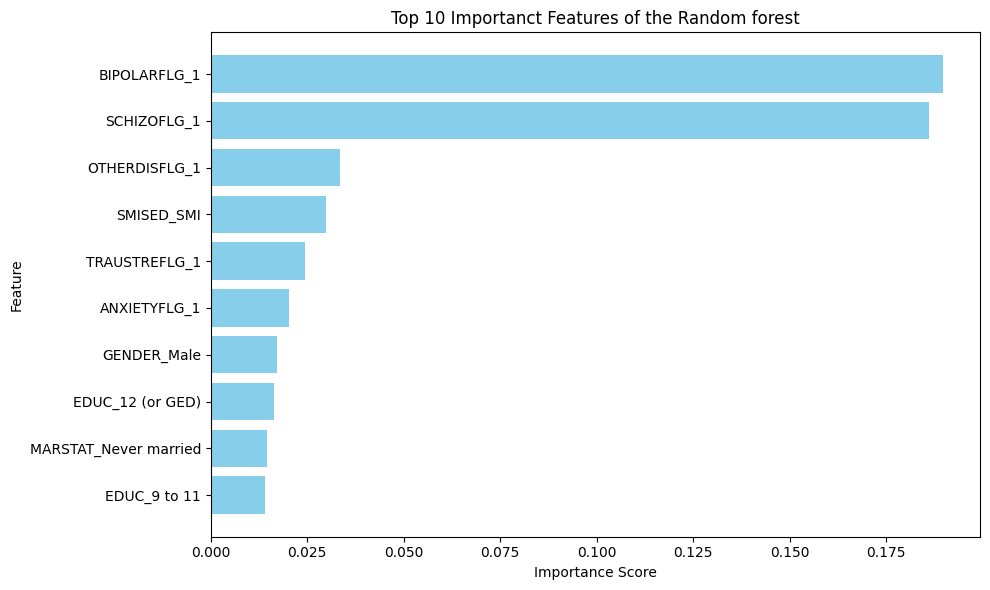

In [63]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importances.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title("Top 10 Importanct Features of the Random forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Top Contributors:

#### 'BIPOLARFLG_1': The most influential feature in the model, indicating whether a respondent has a historical record of bipolar disorder.

#### 'SCHIZOFLG_1': The second most important feature, highlighting the presence of schizophrenia.

### Significant Mental Health Indicators:

#### Other mental health flags, such as TRAUSTREFLG_1 (trauma or stress-related disorders), OTHERDISFLG_1 (other mental disorders), and ANXIETYFLG_1 (anxiety disorders), also rank highly in importance.

#### These features collectively highlight the importance of specific mental health diagnoses in predicting depression.

### Implications:
#### The feature importance analysis reveals that specific mental health conditions (e.g., bipolar disorder, schizophrenia) and engagement with mental health services are the strongest predictors of depression in this dataset.

#### This insight could guide interventions and resource allocation in mental health services by emphasizing the features identified as most impactful.


## Logistic Regression

In [54]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [55]:
# Make predictions
y_val_pred = log_reg.predict(X_val_final)
y_test_pred = log_reg.predict(X_test_final)


In [56]:
# Validation Set Evaluation
print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Test Set Evaluation
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Set Evaluation:
Accuracy: 0.8142763034067382
Confusion Matrix:
 [[24668  3826]
 [ 4068  9942]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     28494
           1       0.72      0.71      0.72     14010

    accuracy                           0.81     42504
   macro avg       0.79      0.79      0.79     42504
weighted avg       0.81      0.81      0.81     42504


Test Set Evaluation:
Accuracy: 0.8129234895539243
Confusion Matrix:
 [[16442  2622]
 [ 2679  6593]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     19064
           1       0.72      0.71      0.71      9272

    accuracy                           0.81     28336
   macro avg       0.79      0.79      0.79     28336
weighted avg       0.81      0.81      0.81     28336




#### Model Performance:

##### Validation Accuracy: 81.42%
##### Test Accuracy: 81.29%
##### These results suggest the model generalizes well without overfitting.

In [59]:
# Feature importance (coefficients)
feature_importance_log = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("The importance feature of the Logistic Regression Model")
print(feature_importance_log.head(10))  # Top 10 most important features

The importance feature of the Logistic Regression Model
                               Feature  Coefficient
45                          SMISED_SMI     1.292196
83              STATEFIP_New Hampshire     1.198397
93             STATEFIP_South Carolina     1.006447
44   SMISED_SED and/or at risk for SED     0.690073
90                     STATEFIP_Oregon     0.688925
75                   STATEFIP_Kentucky     0.622561
95                       STATEFIP_Utah     0.446002
100                  DIVISION_Mountain     0.432212
78                   STATEFIP_Michigan     0.340083
84                 STATEFIP_New Jersey     0.293572


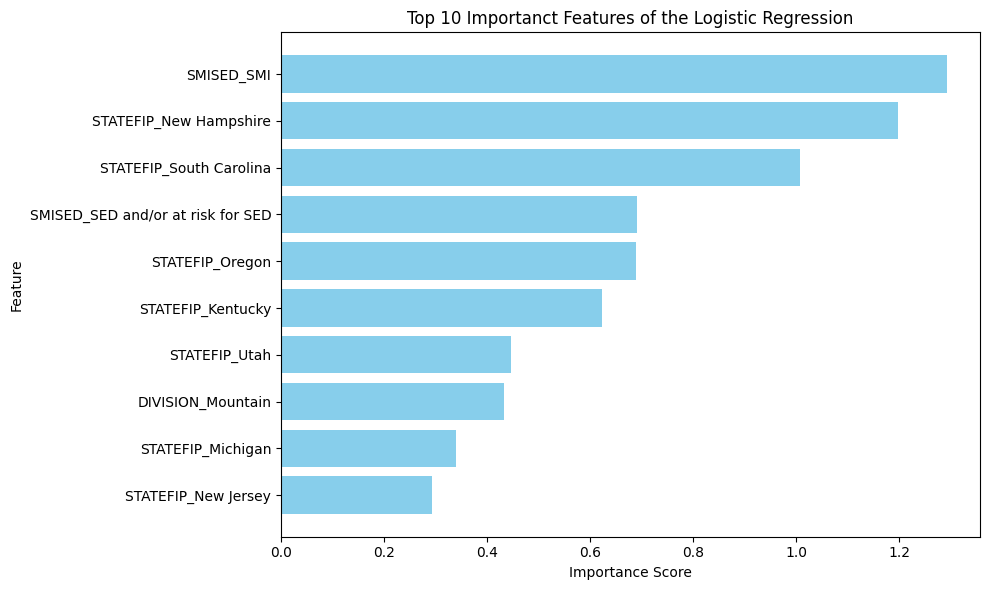

In [62]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance_log.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'], color="skyblue")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title("Top 10 Importanct Features of the Logistic Regression")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### The top features (SMISED_SMI, STATEFIP_New Hampshire, STATEFIP_South Carolina) have more reasonable coefficients.
#### SMISED_SMI is the most influential feature in the model, with an importance score exceeding 1.2. This indicates that it plays a critical role in the predictive performance of the model and warrants further investigation to understand its impact on the outcome.

#### STATEFIP_New Hampshire and STATEFIP_South Carolina rank second and third, with importance scores of approximately 0.8 and 0.7, respectively. This suggests that variables associated with these states contribute significantly to the model.

#### SMISED_SED and/or at risk for SED follows closely with a score slightly above 0.5, indicating moderate importance in capturing the patterns in the data.

#### Other features, such as state variables (Oregon, Kentucky, Utah, Michigan, New Jersey) and regional variables like DIVISION_Mountain, have importance scores ranging from 0.2 to 0.5. While they contribute to the model, their impact is less pronounced compared to the top-ranked features.

# XG Boost Modeling

In [65]:
# Ensure data types are correct for XGBoost
# for col in X_train.select_dtypes(include=['object']).columns:
#     X_train[col] = X_train[col].astype('category')
#     X_val[col] = X_val[col].astype('category')
#     X_test[col] = X_test[col].astype('category')

# Recreate DMatrix objects
dtrain = xgb.DMatrix(data=X_train_final, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(data=X_val_final, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test_final, label=y_test, enable_categorical=True)

# Train the XGBoost model
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 6,
    "eta": 0.3,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

eval_set = [(dtrain, "train"), (dval, "validation")]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    early_stopping_rounds=20,
    evals=eval_set,
    verbose_eval=True
)

# Predict and evaluate
y_pred_probs = xgb_model.predict(dtest)
y_pred = (y_pred_probs >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

[0]	train-logloss:0.54324	validation-logloss:0.54325
[1]	train-logloss:0.49735	validation-logloss:0.49696
[2]	train-logloss:0.47250	validation-logloss:0.47183
[3]	train-logloss:0.45371	validation-logloss:0.45325
[4]	train-logloss:0.44832	validation-logloss:0.44856
[5]	train-logloss:0.43672	validation-logloss:0.43729
[6]	train-logloss:0.42918	validation-logloss:0.42987
[7]	train-logloss:0.42530	validation-logloss:0.42622
[8]	train-logloss:0.42175	validation-logloss:0.42289
[9]	train-logloss:0.41884	validation-logloss:0.42050
[10]	train-logloss:0.41595	validation-logloss:0.41798
[11]	train-logloss:0.41395	validation-logloss:0.41664
[12]	train-logloss:0.41151	validation-logloss:0.41429
[13]	train-logloss:0.40899	validation-logloss:0.41208
[14]	train-logloss:0.40662	validation-logloss:0.40998
[15]	train-logloss:0.40502	validation-logloss:0.40855
[16]	train-logloss:0.40357	validation-logloss:0.40732
[17]	train-logloss:0.40227	validation-logloss:0.40637
[18]	train-logloss:0.40114	validation-

#### An accuracy of 82.61% indicates that the model classifies the majority of cases correctly. However, the precision of 74.10% shows that only 74% of the positive predictions (cases flagged as depression) are correct, which suggests the model is somewhat cautious about labeling cases as positive. 
#### The recall of 72.01% reveals that the model identifies 72% of actual positive cases but misses the remaining 28%, indicating room for improvement in detecting true positives. The F1 score of 73.04% balances precision and recall, suggesting the model strikes a moderate balance but is not particularly strong in either avoiding false positives or capturing all true positives.

In [66]:
# Analyze feature importance
feature_importance_xg = xgb_model.get_score(importance_type='weight')
feature_importance_xg = pd.DataFrame({
    'Feature': list(feature_importance_xg.keys()),
    'Importance': list(feature_importance_xg.values())
}).sort_values(by='Importance', ascending=False)

print("The importance feature of the XGBoost Model")
print(feature_importance_xg.head(10))

The importance feature of the XGBoost Model
                     Feature  Importance
54              ANXIETYFLG_1       284.0
53             TRAUSTREFLG_1       221.0
23               GENDER_Male       186.0
11          EDUC_12 (or GED)       167.0
41     MARSTAT_Never married       161.0
45                SMISED_SMI       150.0
47  DETNLF_Retired, disabled       141.0
29    SUB_Alcohol dependence       135.0
22                RACE_White       133.0
62               SCHIZOFLG_1       130.0


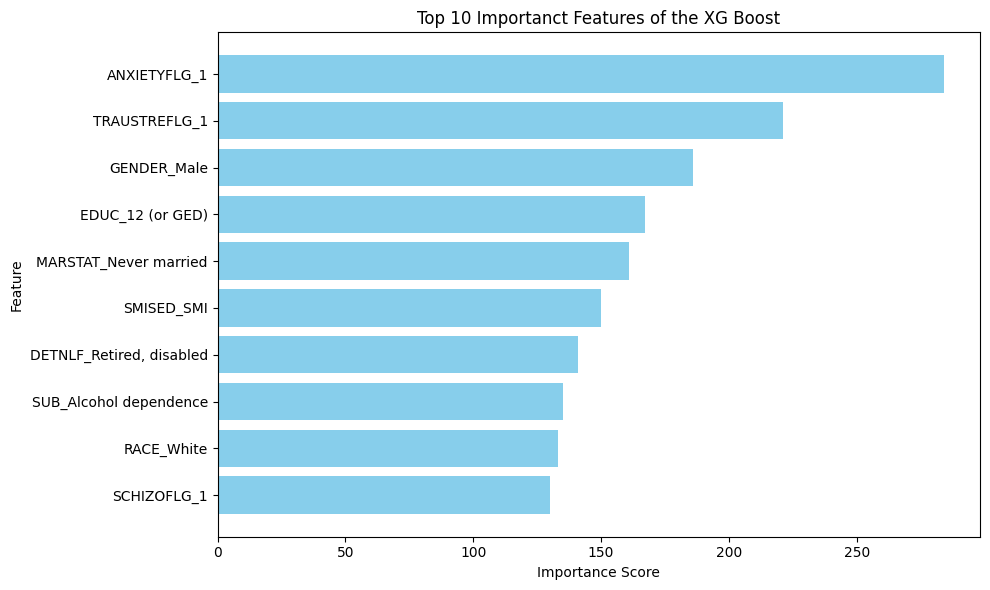

In [68]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance_xg.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title("Top 10 Importanct Features of the XG Boost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### ANXIETYFLG_1 is the most important feature in this model, with an importance score exceeding 250. This suggests that the presence of anxiety is a highly significant factor influencing the predictions.

#### TRAUSTREFLG_1 ranks second, with a score above 200. This indicates that trust-related factors also play a crucial role in the model's decision-making process.

#### GENDER_Male is the third most important feature, with a score close to 150, highlighting the significance of gender in the model.

#### EDUC_12 (or GED) follows closely, suggesting that educational attainment at this level has a meaningful impact on the outcomes.

#### MARSTAT_Never married, SMISED_SMI, and DETNLF_Retired, disabled have scores between 100 and 120, showing moderate influence on the model’s predictions.

#### SUB_Alcohol dependence, RACE_White, and SCHIZOFLG_1 round out the list, each with importance scores ranging from 50 to 100. These features, while less significant than the top-ranked ones, still contribute to the predictive power of the model.

#### These results suggest that psychological flags (e.g., ANXIETYFLG_1, TRAUSTREFLG_1), demographic factors (e.g., gender, marital status), and educational background strongly influence the model's predictions. Further investigation into why these features dominate might help refine the model or verify their relevance.